## Importando bibliotecas

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Leitura dos dados

In [6]:
df = pd.read_csv("Consumo_cerveja.csv", sep=";")
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


### Dados do Dataset
### Consumo de cerveja em São Paulo 2015
#### .data - Data
#### .temp_media - temperatura Média(c)
#### .temp_min - temperatura Minima(c)
#### .temp_max - temperatura Maxima (c)
#### .chuva - Precipitação (mm)
#### .fds - final de semana(1= sim, 0=não)
#### .consumo - consumo de cerveja (litros)

## Verificando o tamanho do dataset

In [7]:
df.shape

(365, 7)

## Estatísticas descritivas

In [11]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Identificar a relação entre as linhas, conhecido como Matriz de correlação

In [13]:
df.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


### Ao ver a relação irei tirar os dados que vou utilizar para a regressão é importante que as variáveis explicativas X's não tenham forte correlação entre si.

## Realizando algumas Analises graficas

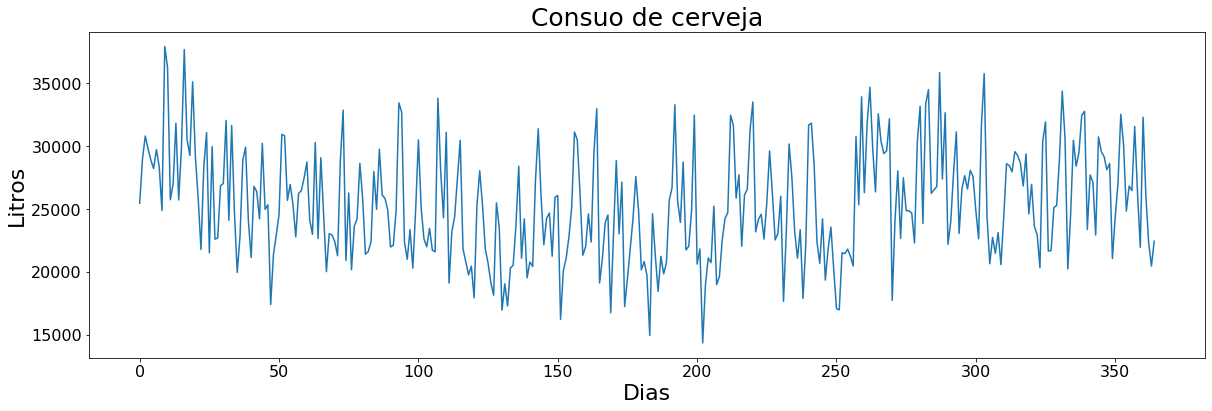

In [21]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consuo de cerveja', fontsize= 25)
ax.set_ylabel('Litros', fontsize= 22)
ax.set_xlabel('Dias', fontsize= 22)
ax = df['consumo'].plot(fontsize= 16)

## Visualizar no box-plot tentando encontrar outliers que irá prejudicar na regressão

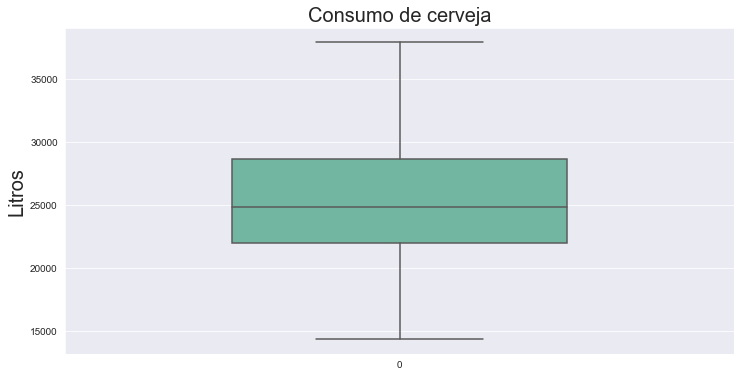

In [54]:
sns.set_palette("Set2")
sns.set_style("darkgrid")
ax = sns.boxplot(data= df['consumo'],orient='v', width= 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize= 20);

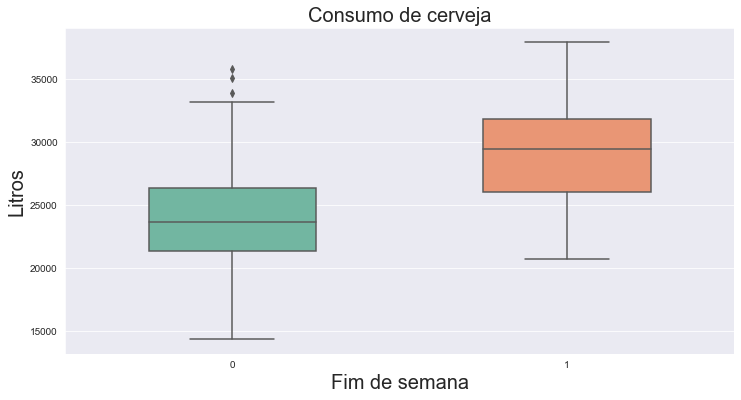

In [55]:
ax = sns.boxplot(y='consumo', x='fds',data=df,orient='v', width= 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize= 20)
ax.set_xlabel('Fim de semana', fontsize= 20);

## No boxplot conseguimos confirmar visualmente que no fim de semana consumimos mais cerveja e que teve alguns outliers nos dias de semana que pode ser possiveis feriados ou outros motivos comemorativos, mas em caso sejam dados sem fundamento deveria retirar

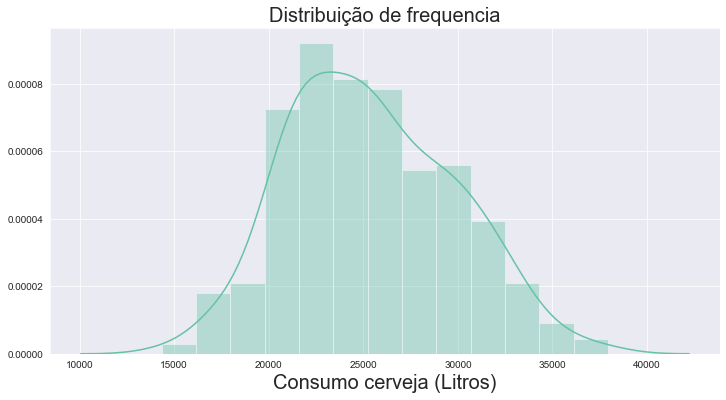

In [60]:
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequencia', fontsize=20)
ax.set_xlabel('Consumo cerveja (Litros)', fontsize= 20);

## Usando as variável dependente e variáveis explicativas

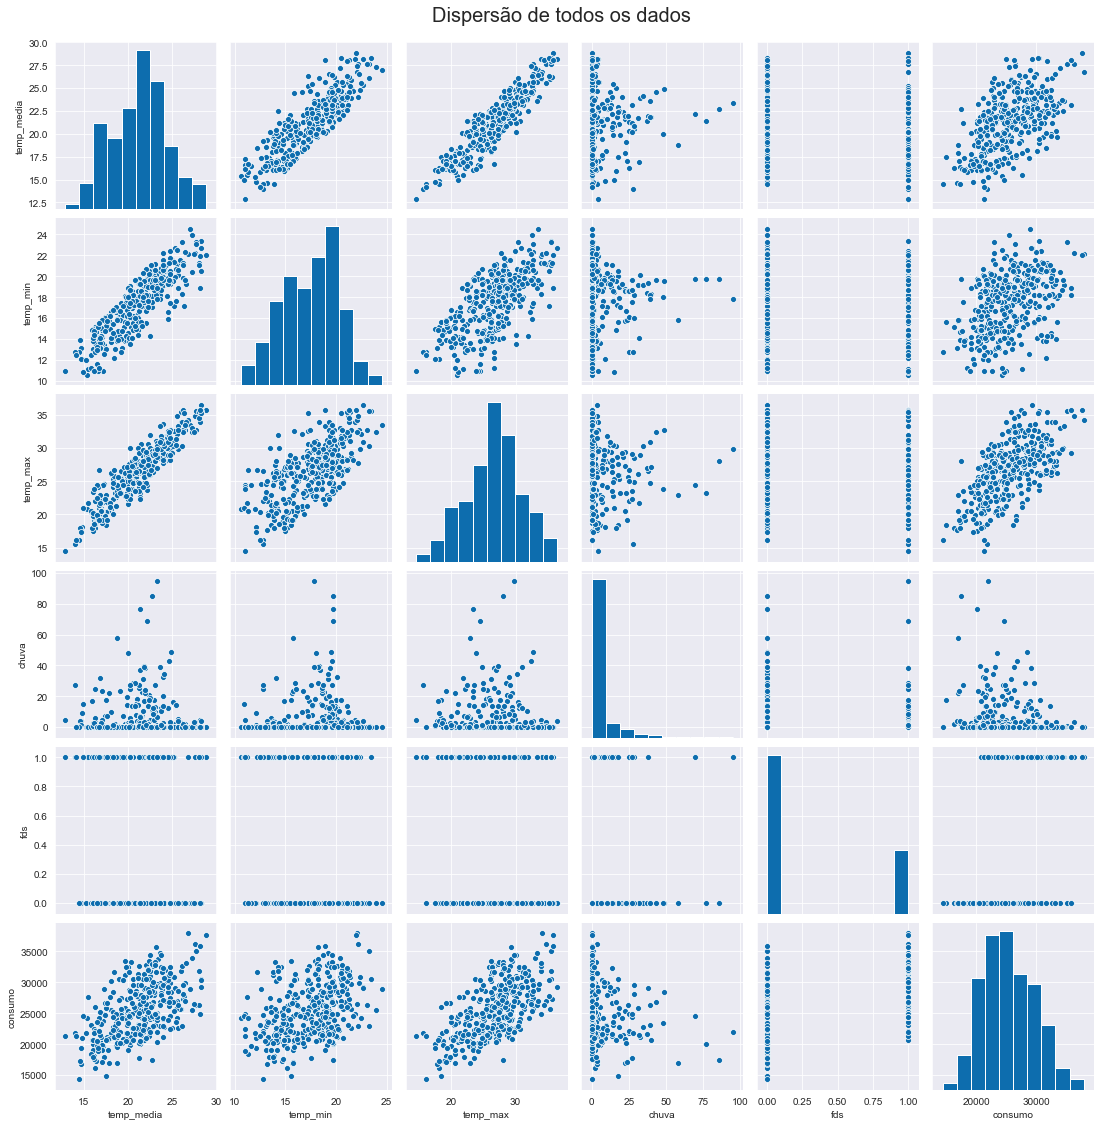

In [105]:
ax = sns.pairplot(df)
ax.fig.suptitle('Dispersão de todos os dados', fontsize= 20, y=1.03);

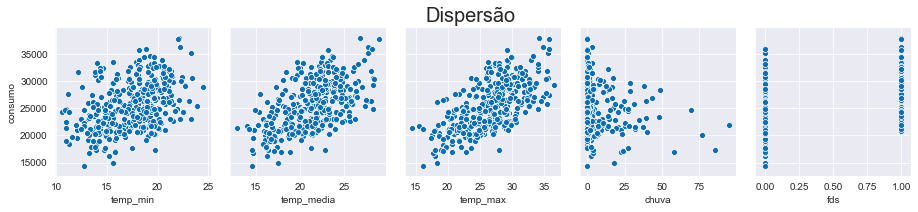

In [101]:
sns.set_palette("GnBu_r")
ax = sns.pairplot(df, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão', fontsize= 20, y=1.1);

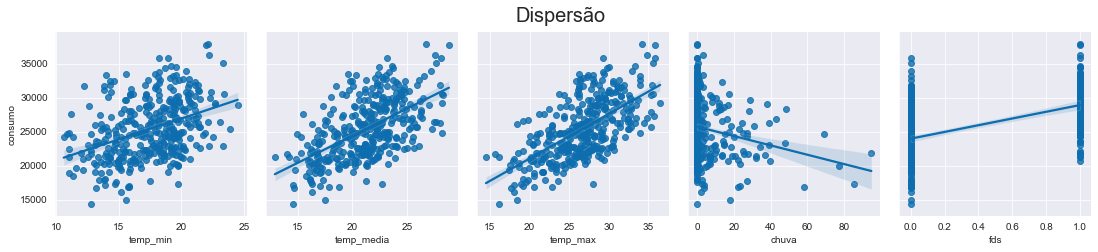

In [102]:
ax = sns.pairplot(df, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'],kind='reg',
                 height= 3)
ax.fig.suptitle('Dispersão', fontsize= 20, y=1.1);

## podemos usar outra ferramenta do seaborn para chegar no mesmo resultado porem ele tem distribuição de frequecia junto, como o intuito é passar um pouco do conhecimento estou adicionando esta outra forma deixando vocês escolher o que for melhor para o projeto

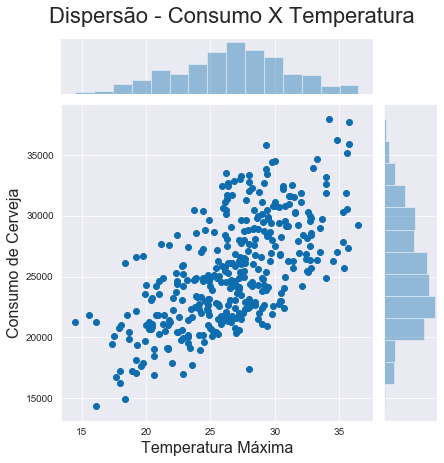

In [110]:
ax = sns.jointplot(x= "temp_max", y= "consumo", data=df)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=22, y= 1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=16);

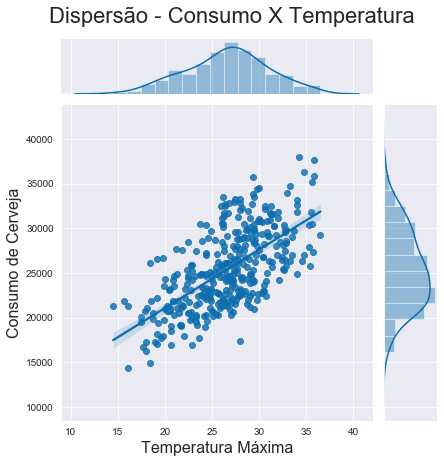

In [111]:
ax = sns.jointplot(x= "temp_max", y= "consumo", data=df, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=22, y= 1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=16);

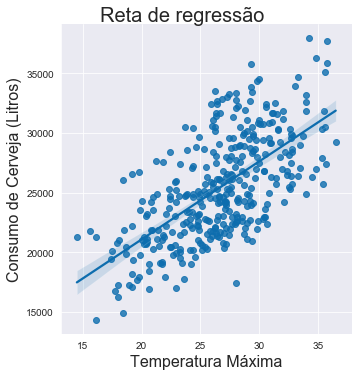

In [113]:
ax = sns.lmplot (x="temp_max", y="consumo", data=df)
ax.fig.suptitle("Reta de regressão", fontsize= 20, y=1.02)
ax.set_xlabels("Temperatura Máxima", fontsize=16)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=16);

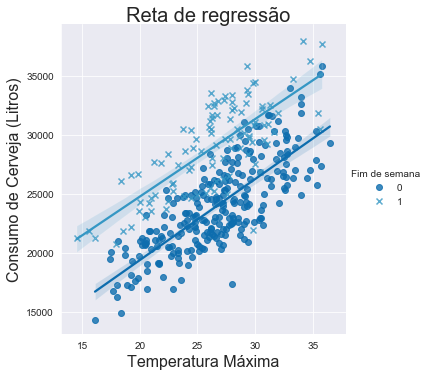

In [114]:
ax = sns.lmplot (x="temp_max", y="consumo", data=df, hue="fds", markers=["o","x"], legend= False)
ax.fig.suptitle("Reta de regressão", fontsize= 20, y=1.02)
ax.set_xlabels("Temperatura Máxima", fontsize=16)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=16);
ax.add_legend(title= "Fim de semana");

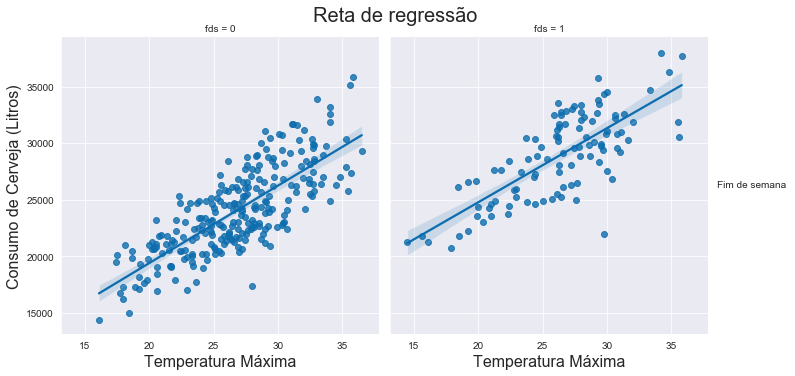

In [117]:
ax = sns.lmplot (x="temp_max", y="consumo", data=df, col="fds")
ax.fig.suptitle("Reta de regressão", fontsize= 20, y=1.02)
ax.set_xlabels("Temperatura Máxima", fontsize=16)
ax.set_ylabels("Consumo de Cerveja (Litros)", fontsize=16);
ax.add_legend(title= "Fim de semana");

 ## Agora que ja verificamos tudo sobre o dataset iremos criar nossos modelos para Regressão Linear com sckit-learn ML

In [118]:
from sklearn.model_selection import train_test_split

## Agora irei dividir entre o que eu quero prever Y

In [119]:
y= df['consumo']

## Esta são as explicativas X

In [121]:
X= df[['temp_max','chuva', 'fds']]

## Criando os datasets de treino e teste

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Verificando os datasets criados

In [194]:
X_train.shape

(244, 3)

In [195]:
X_test.shape

(121, 3)

In [196]:
y_train.shape

(244,)

In [197]:
y_test.shape

(121,)

## Importando Bibliotecas do Scikit-learn para LinearRegessione metrics

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [199]:
modelo = LinearRegression()

## Vamos estimar nosso modelo (y_train e X_train)

In [200]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Agora obtive o R2

In [218]:
print('R2 = {}'.format(modelo.score(X_train, y_train).round(2)))

R2 = 0.71


## Previsões para os dados de Teste

In [202]:
previsao = modelo.predict(X_test)

In [203]:
print('R2 = %s' % metrics.r2_score(y_test, previsao).round(2))

R2 = 0.75


# Usando dados de entrada para conseguir retorno de valores previstos

In [204]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
48,26.4,13.4,0


In [205]:
modelo.predict(entrada)[0].round(2)

23342.55

## Dados que podem ser imputados por uma API e devolver uma previsão ao usuario

In [206]:
temp_max = 40.0
chuva = 10.2
fds = 1
entrada = [[temp_max, chuva, fds]]

print('{} Litros'.format(modelo.predict(entrada)[0].round(2)))

37936.18 Litros


## Analise grafica dos modelos de previsões

In [207]:
previsao_treino = modelo.predict(X_train)

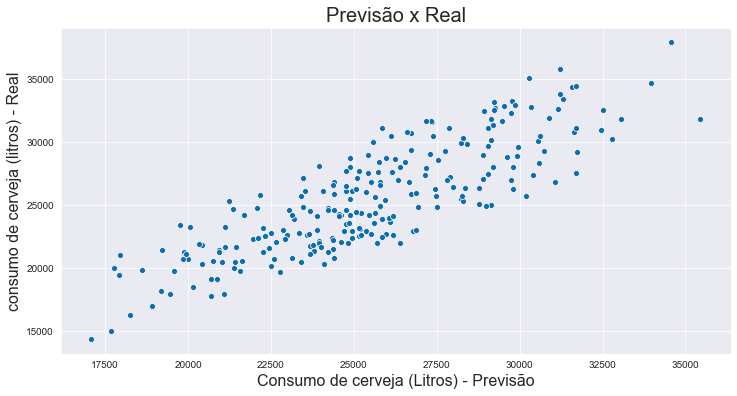

In [208]:
ax = sns.scatterplot(x=previsao_treino,y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão x Real", fontsize= 20)
ax.set_xlabel("Consumo de cerveja (Litros) - Previsão", fontsize= 16)
ax.set_ylabel("consumo de cerveja (litros) - Real", fontsize= 16);

In [209]:
residuo = y_train - previsao_treino
residuo

84     1604.834056
144    1320.138267
113    -842.075461
115    3094.009408
352      18.913147
          ...     
184    -131.851681
90    -2843.749409
297    2220.167487
240    2215.591829
236    1152.749818
Name: consumo, Length: 244, dtype: float64

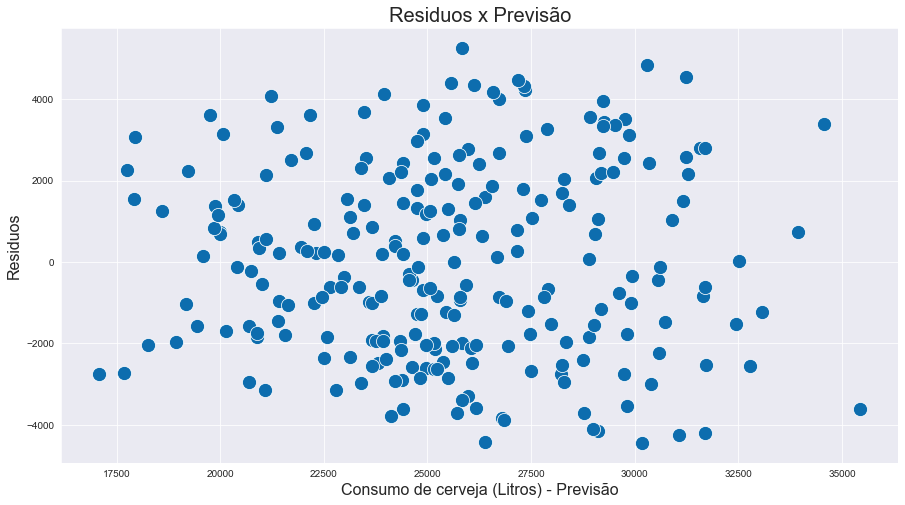

In [210]:
ax = sns.scatterplot(x=previsao_treino,y = residuo, s=200)
ax.figure.set_size_inches(15,8)
ax.set_title("Residuos x Previsão", fontsize= 20)
ax.set_xlabel("Consumo de cerveja (Litros) - Previsão", fontsize= 16)
ax.set_ylabel("Residuos", fontsize= 16);

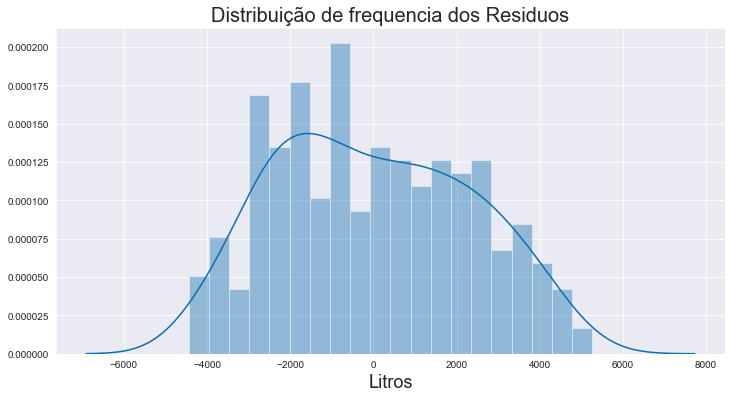

In [211]:
ax = sns.distplot(residuo, bins= 20)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequencia dos Residuos", fontsize= 20)
ax.set_xlabel("Litros", fontsize= 18);


## Comparando Modelos

In [212]:
X2 = df[["temp_media","chuva", "fds"]]

In [213]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33)

In [214]:
modelo_2 = LinearRegression()

In [215]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
print('Modelo_2 temp_media')
print('R2 = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo_2 temp_media
R2 = 0.69


In [222]:
print('Modelo_1 temp_max')
print('R2 = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo_1 temp_max
R2 = 0.71


In [225]:
previsao_2 = modelo_2.predict(X2_test)

In [227]:
print('Modelo_2 temp_media')
print('R2 = %s' % metrics.r2_score(y2_test, previsao_2).round(2))

Modelo_2 temp_media
R2 = 0.58


In [228]:
print('Modelo_1 temp_max')
print('R2 = %s' % metrics.r2_score(y_test, previsao).round(2))

Modelo_1 temp_max
R2 = 0.75


## Conclusão que o modelo 1 com temperatura Maxima explica melhor a variação do consumo de cerveja

## Verificando o Erro Quadratico medio e Raiz do erro quadratico medio

In [237]:
EQM_2 = metrics.mean_squared_error(y2_test, previsao_2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, previsao_2))
R2_2 = metrics.r2_score(y2_test, previsao_2)

modelo2 = pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM','REQM','R2'], columns=['Metricas'])
modelo2.round(2)

,Metricas
EQM,7624448.37
REQM,2761.24
R2,0.58


In [236]:
EQM_1 = metrics.mean_squared_error(y_test, previsao)
REQM_1 = np.sqrt(metrics.mean_squared_error(y_test, previsao))
R2_1 = metrics.r2_score(y_test, previsao)

modelo1 = pd.DataFrame([EQM_1,REQM_1,R2_1],['EQM','REQM','R2'], columns=['Metricas'])
modelo1.round(2)

,Metricas
EQM,5269023.04
REQM,2295.44
R2,0.75


## Salvando modelo e carregando

In [238]:
X_test[0:1]

,temp_max,chuva,fds
48,26.4,13.4,0


In [239]:
entrada = X_test[0:1]

In [245]:
modelo.predict(entrada)[0].round(2)

23342.55

## Usando pickle para salvar

In [246]:
import pickle

In [253]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)


In [254]:
output.close()